# 1. Multiplikation zweier Cosinussignale unterschiedlicher Frequenz

**Fouriertransformation:** $$ Y(f)=\int_{-\infty}^{\infty}y(t)  \cdot e^{-j2\pi ft}dt = \int_{-\infty}^{\infty}y(t)\cdot(\text{cos}(2\pi\cdot f \cdot t)-j\text{ sin}(2\pi\cdot f \cdot t))$$

Signale sind also aus Cosinus- und Sinusanteilen zusammengesetzt. Was passiert, wenn ich ein Cosinussignal mit einem Cosinusssignal anderer Frequenz multipliziere?
    
Schwarz: $y_1(t)=cos(2\pi\cdot 1 \text{Hz} \cdot t) $, Cosinus mit 1 Hz

Rot: $y_1(t)=cos(2\pi\cdot f\cdot t) $, Cosinus mit einstellbarer Frequenz f

Blau (Fläche blau unterlegt):  $y_1(t)\cdot y_2(t)$, Produkt beider Signale

Bei der Fouriertransformation wird über das Produkt integriert von $t=-\infty$ bis $\infty$, d.h. die Fläche berechnet, wobei Anteile unter 0 negativ eingehen. Ist die Frequenz beider Cosinusfunktionen nicht exakt gleich (bis ggf. auf's Vorzeichen), heben sich positive und negative Flächenanteile auf => das Integral wird 0.

interactive(children=(FloatSlider(value=1.0, description='f', max=1.5, min=0.75, step=0.05), Output()), _dom_c…

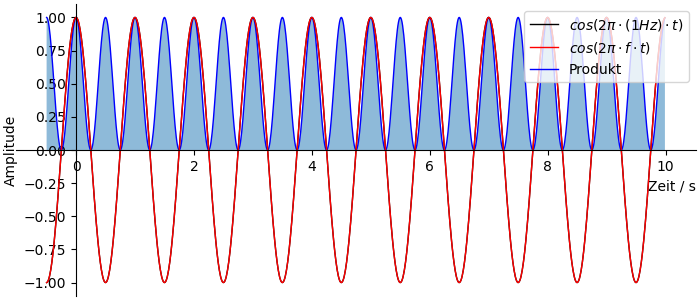

In [6]:
""" Port von CosinusMultiplikation.mlx 

(c) Benno Dömer | HS Pforzheim 2022-10-17 

"""
import platform
if platform.system() == "Emscripten": # running in JupyterLite
    %pip install -q ipywidgets
    %pip install -q ipympl
#%matplotlib inline
%matplotlib widget 
from numpy import (pi, log10, exp, sqrt, sin, cos, tan, angle, arange, linspace, zeros, ones)
import ipywidgets as widgets
import matplotlib.pyplot as plt
#from matplotlib.pyplot import (figure, plot, stem, legend,  
#                               grid, xlabel, ylabel, subplot, title, clf, xlim, ylim)
#from matplotlib.pyplot import fill_between as area 
# Demo für das Verständnis der Fouriertransformation
# (c) Benno Dömer, 2022-03-23


fig1, ax1 = plt.subplots(figsize=(7, 3), dpi=100, layout='constrained',num='Multiplikation zweier Cosinusfunktionen')
#plt.show()

def myplotstyle(ax): # Hilfsfunktion, hübscht den Plot etwas auf
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.spines['bottom'].set_position(('data',0))
    ax.yaxis.set_ticks_position('left')
    ax.spines['left'].set_position(('data',0))

def plotdata(f): # plotdata wird aufgerufen, wenn der Slider bewegt wird
    N=1000
    k = arange(-50,N) # Matlab: k = 0:N-1;
    fa = 100
    s = cos(2*pi*k/fa)
    s2 = cos(2*pi*k*f/fa)
    ax1.clear()
    ax1.fill_between(k/fa,s*s2, alpha=0.5) #fill_between(k/fa,s*s2, alpha=0.5)
    line3, = ax1.plot(k/fa,s*s2,label='Produkt', color='blue',linewidth=1.0, linestyle="-") # plot(k/fa,s*s2)
    line1, = ax1.plot(k/fa,s,label=r'$cos(2\pi\cdot (1 Hz)\cdot  t)$',
                  color="black", linewidth=1.0, linestyle="-")
    line2, = ax1.plot(k/fa,s2,label=r'$cos(2\pi\cdot f \cdot t)$',color="red", linewidth=1.0, linestyle="-")
    ax1.legend(handles=[line1, line2, line3],loc='upper right')
    #ax1.grid(linewidth='0.5')
    ax1.set_xlabel('Zeit / s',loc="right")
    ax1.set_ylabel('Amplitude')
    myplotstyle(ax1)
    fig1.canvas.draw()
    
interactive_plot = widgets.interactive(plotdata, f=widgets.FloatSlider(min=0.75, max=1.5, step=.05, value=1)) 
display(interactive_plot)
plt.show()
#interactive_plot   



**Fazit:** Die Multiplikation mit sin- und cos-Funktionen und anschließende Integration über das Produkt filtert den jeweiligen Frequenzanteil heraus. Nur wenn ein entsprecheder Frequenzanteil im Signal überhaupt enthalten ist, wird das Integral über das Produkt ungleich 0. Besteht das Signal aus einem "puren" Cosinussignal, geht das Integral gegen Unendlich: Das führt zu den Diracimpulsen im Spektrum bei $\pm f$. 

# 2. Multiplikation zweier sinusförmiger Signale gleicher Frequenz mit unterschiedlicher Phase

Was passiert nun, wenn ich ein Cosinussignal mit einem sinusförmigen Signal gleicher Frequenz, aber mit anderer Phasenlage multipliziere, und dann über das Ergebnis integriere?
    
Schwarz: $y_1(t)=cos(2\pi\cdot 1 \text{Hz} \cdot t) $, Cosinus mit 1 Hz

Rot: $y_1(t)=cos(2\pi\cdot \text{1 Hz} \cdot t + \phi_0 ) $, Cosinus mit einstellbarer Phase 

Blau (Fläche blau unterlegt):  $y_1(t)\cdot y_2(t)$, Produkt beider Signale


Je nach Phase sind die blauen Flächen insgesamt negativ, positiv oder 0 (letztes bei Phasenversatz $\pm \pi/2$). 

interactive(children=(FloatSlider(value=0.0, description='$\\phi_0/\\pi$', max=1.0, min=-1.0, step=0.05), Outp…

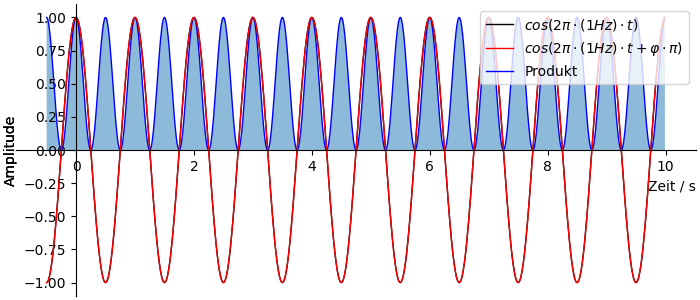

In [9]:
# Now let's have a look at phase
fig2, ax2= plt.subplots(figsize=(7, 3), dpi=100, layout='constrained',num='Multiplikation zweier Cosinusfunktionen gleicher Frequenz und unterschiedlicher Phase')
#plt.show()
def plotphasedata(phi): # plotdata wird aufgerufen, wenn der Slider bewegt wird
    ax2.clear()
    N=1000
    k = arange(-50,N) # Matlab: k = 0:N-1;
    fa = 100
    s = cos(2*pi*k/fa)
    s3 = cos(2*pi*k*1/fa+phi*pi)
    ax2.fill_between(k/fa,s*s3, alpha=0.5) #fill_between(k/fa,s*s2, alpha=0.5)
    line3, = ax2.plot(k/fa,s*s3,label='Produkt', color='blue',linewidth=1.0, linestyle="-") # plot(k/fa,s*s2)
    line1, = ax2.plot(k/fa,s,label=r'$cos(2\pi\cdot (1 Hz)\cdot  t)$',
                  color="black", linewidth=1.0, linestyle="-")
    line2, = ax2.plot(k/fa,s3,label=r'$cos(2\pi\cdot (1 Hz)\cdot  t + \varphi\cdot \pi)$',color="red", linewidth=1.0, linestyle="-")
    ax2.legend(handles=[line1, line2, line3], loc='upper right')
    #ax2.grid(linewidth='0.5')
    ax2.set_xlabel('Zeit / s',loc='right')
    ax2.set_ylabel('Amplitude')
    myplotstyle(ax2)
    fig2.canvas.draw()

interactive_plot2 = widgets.interactive(plotphasedata, phi=widgets.FloatSlider(min=-1, max=1, step=.05, value=0, description='$\phi_0/\pi$')) 
#output = interactive_plot2.children[-1]
display(interactive_plot2)
plt.show()


**Fazit:** Durch die Multiplikation mit dem Cosinussignal und dem Sinussignal (genauer $j\cdot sin(2 \pi f t)$) bei einer gegebenen Freqenz wird die Phasenlage des jeweilige Signalanteils bestimmbar. 